## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-07-07 15:51:07.607106: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 15:51:09.541898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-07 15:51:12.524657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  import numpy.matlib as npm

  au

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 26.4%
RAM Usage: 6.9%
Available RAM: 937.2G
Total RAM: 1007.0G
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [8]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: [113, 113, 113, 116]
feature_name: transcriptome_PCA, processing_type: None
features ['transcriptome_PCA']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: ru942duk
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/ru942duk
Initialized sweep with ID: ru942duk


  warnings.warn(



2
3
4
BEST CONFIG {'input_dim': 54, 'binarize': False, 'learning_rate': 0.0005, 'batch_size': 512, 'regularization': 'l2', 'lambda_reg': 0.01, 'epochs': 100}
Total number of learnable parameters in BilinearCMmodel: 730
Running train evaluation...

=== TRAIN EVALUATION ===
Evaluating 342 regions, 116622 connections


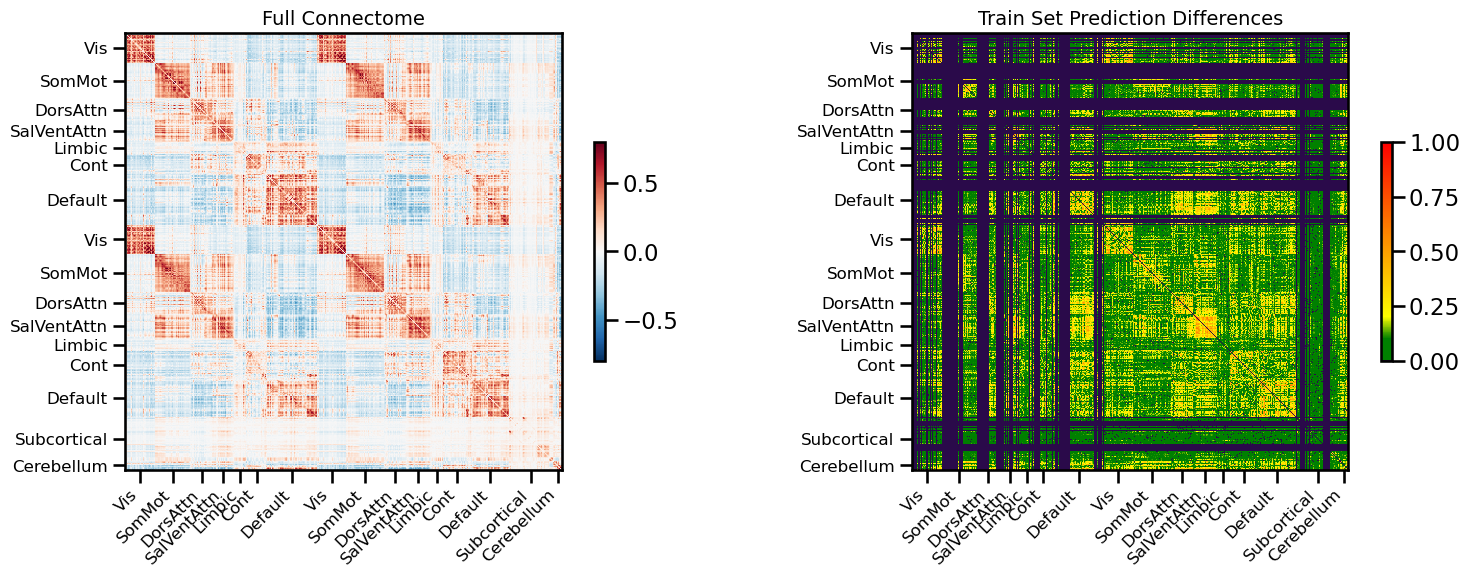

<Figure size 640x480 with 0 Axes>

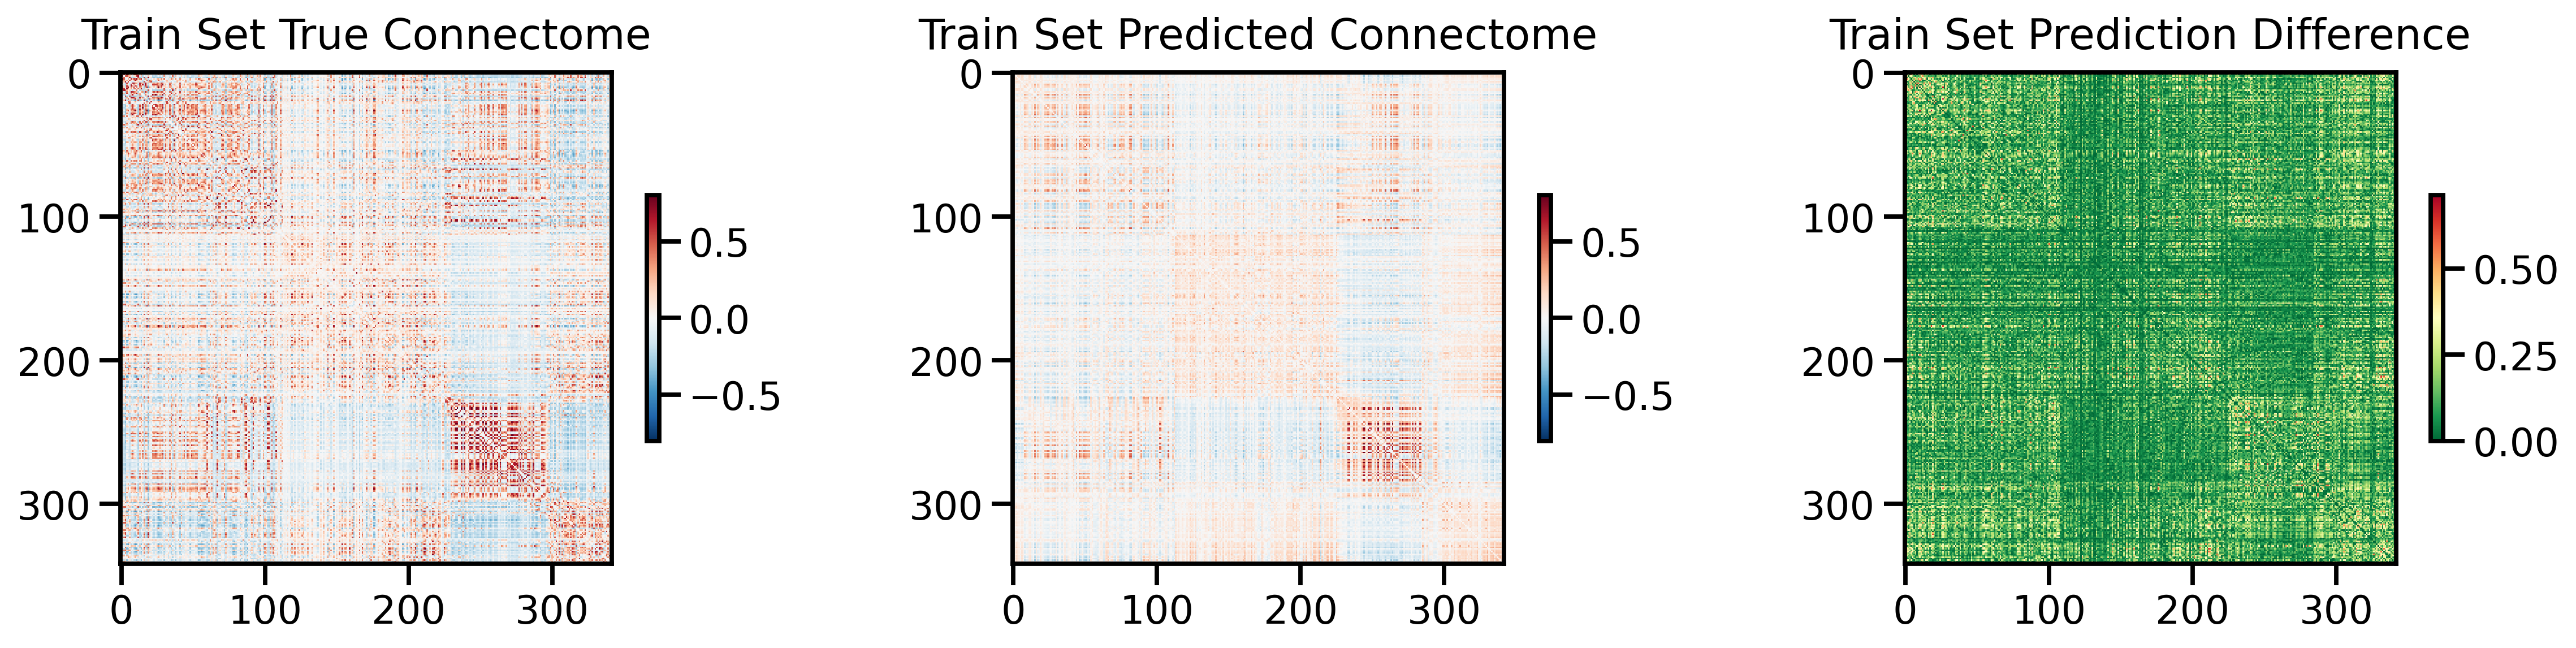

<Figure size 640x480 with 0 Axes>

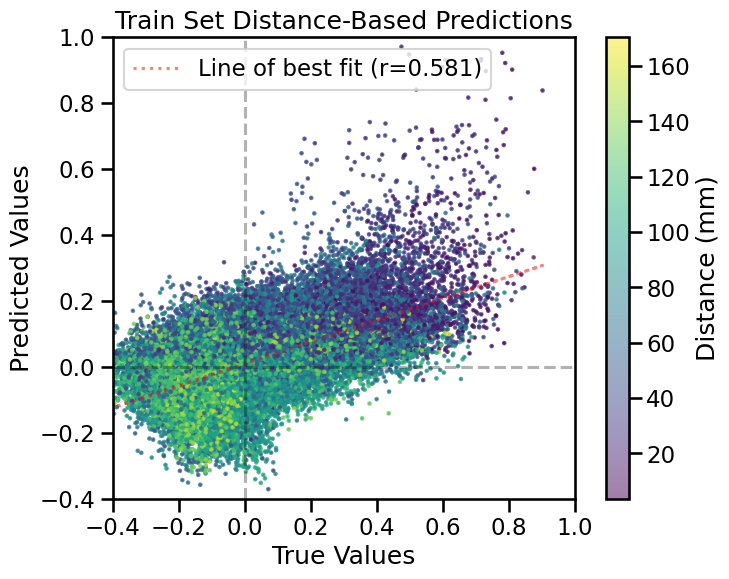

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 113 regions, 12656 connections


<Figure size 640x480 with 0 Axes>

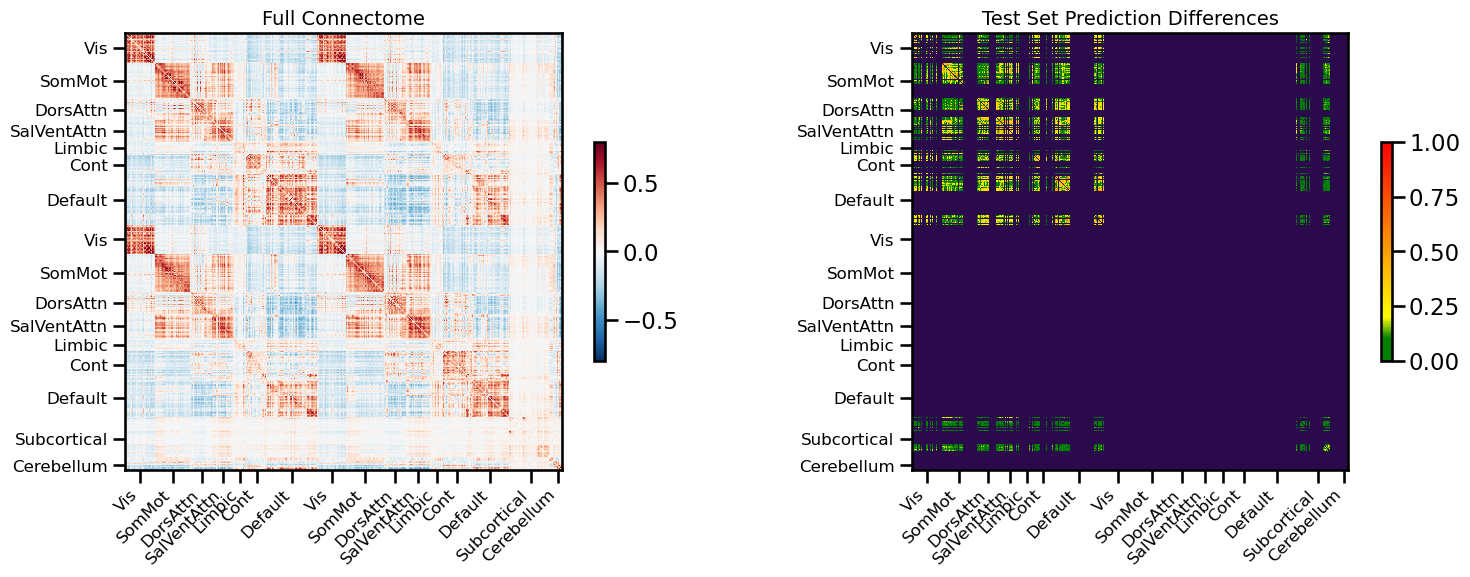

<Figure size 640x480 with 0 Axes>

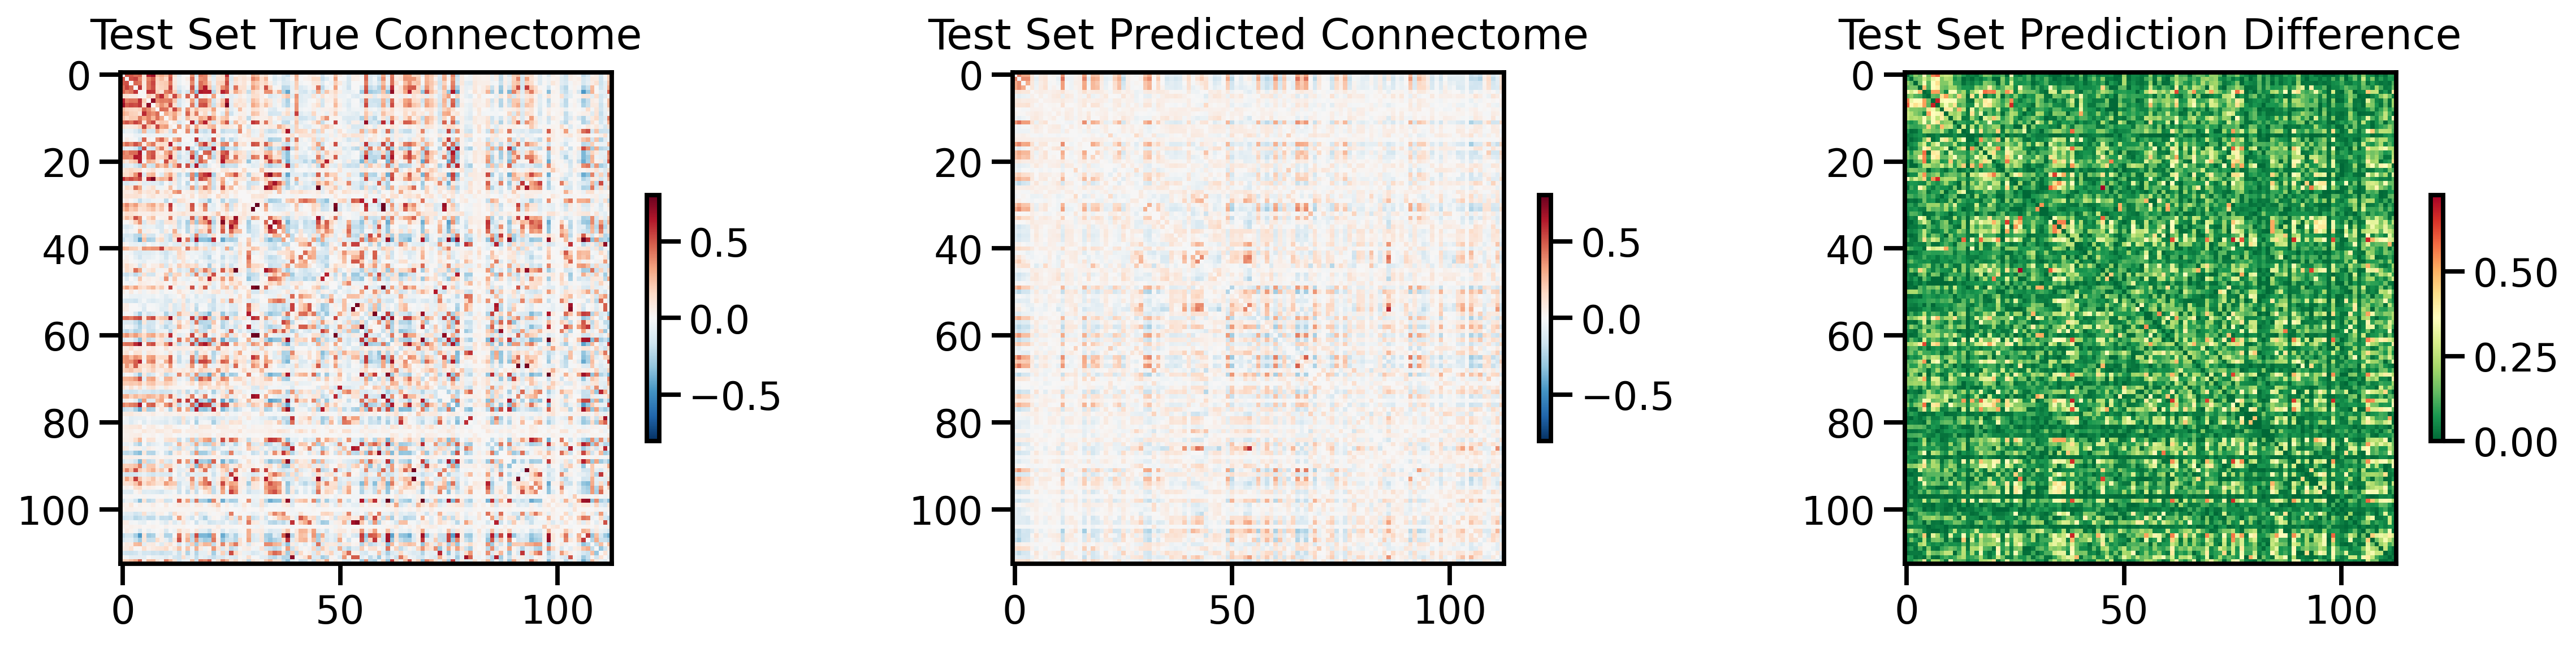

<Figure size 640x480 with 0 Axes>

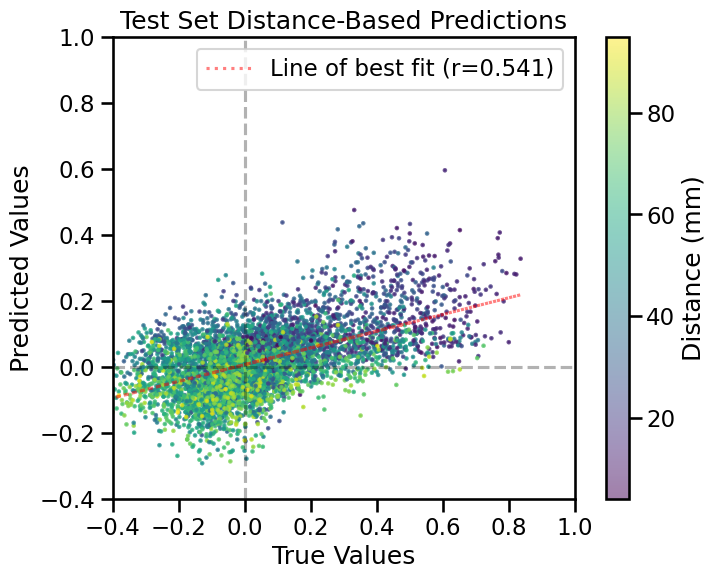

TRAIN METRICS
GLOBAL: mse=0.022158, mae=0.111804, r2=0.3375, pearson_r=0.5810, spearman_r=0.5401, geodesic_distance=26.2771
DISTANCE-BASED: short=0.6322, mid=0.4544, long=0.3643
HEMISPHERIC: left=0.6213, right=0.5925, inter=0.5671
CONNECTION STRENGTH: neg=-0.0178, weak=0.4485, pos=0.3697
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.3638    0.5005
  Default       0.5607    0.4219
  SalVentAttn    0.4820    0.4488
  Limbic        0.3928    0.3254
  DorsAttn      0.4845    0.4172
  SomMot        0.4945    0.5621
  Vis           0.3928    0.3028
  Subcortical    0.5311    0.4423
  Cerebellum    0.0245    0.2851

TEST METRICS
GLOBAL: mse=0.029088, mae=0.124669, r2=0.2733, pearson_r=0.5414, spearman_r=0.4818, geodesic_distance=16.3333
DISTANCE-BASED: short=0.5519, mid=0.3666
HEMISPHERIC: left=0.5414
CONNECTION STRENGTH: neg=0.1326, weak=0.3698, pos=0.2405
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ----------------------

0

<Figure size 640x480 with 0 Axes>

In [12]:
single_sim_run(
              feature_type=[{'transcriptome_PCA': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='spatial',
              random_seed=1,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='bilinear_CM',
              use_gpu=True, 
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

In [29]:
# takes 38 minutes for 4 folds in parallel on h100
# 13 mins single fold a100